#### Example 2: fit of a decaying sine wave
#### In this example, we will explain some of the options of the algorithm.
#### We start off by generating some synthetic data with noise for a decaying sine wave, define an objective function, and create/initialize a Parameter set.

In [1]:
import copy

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Minimizer, Parameters, fit_report

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

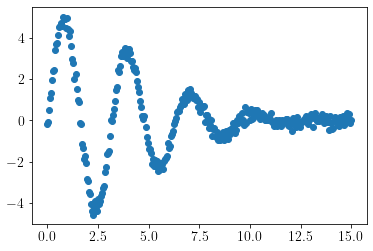

In [2]:
x = np.linspace(0, 15, 301)
np.random.seed(7)
noise = np.random.normal(size=x.size, scale=0.2)
data = (5. * np.sin(2*x - 0.1) * np.exp(-x*x*0.025) + noise)
plt.plot(x, data, 'o')
plt.show()


def fcn2min(params, x, data):
    """Model decaying sine wave, subtract data."""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    return model - data


# create a set of Parameters
params = Parameters()
params.add('amp', value=7, min=2.5)
params.add('decay', value=0.05)
params.add('shift', value=0.0, min=-np.pi/2., max=np.pi/2)
params.add('omega', value=3, max=5)

#### In contrast to the implementation in SciPy (as shown in the first example), varying parameters do not need to have finite bounds in lmfit. However, in that case they do need the brute_step attribute specified, so let's do that:

In [3]:
params['amp'].set(brute_step=0.25)
params['decay'].set(brute_step=0.005)
params['omega'].set(brute_step=0.25)

#### Our initial parameter set is now defined as shown below and this will determine how the grid is set-up.

In [4]:
params.pretty_print()

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp           7      2.5      inf     None     True     None     0.25
decay      0.05     -inf      inf     None     True     None    0.005
omega         3     -inf        5     None     True     None     0.25
shift         0   -1.571    1.571     None     True     None     None


#### First, we initialize a Minimizer and perform the grid search:

In [5]:
fitter = Minimizer(fcn2min, params, fcn_args=(x, data))
result_brute = fitter.minimize(method='brute', Ns=25, keep=25)

#### We used two new parameters here: Ns and keep. The parameter Ns determines the 'number of grid points along the axes' similarly to its usage in SciPy. Together with brute_step, min and max for a Parameter it will dictate how the grid is set-up:
#### (1) finite bounds are specified ("SciPy implementation"): uses brute_step if present (in the example above) or uses Ns to generate the grid. The latter scenario that interpolates Ns points from min to max (inclusive), is here shown for the parameter shift:

In [6]:
par_name = 'shift'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

parameter = shift
number of steps = 25
grid = [-1.57079633 -1.43989663 -1.30899694 -1.17809725 -1.04719755 -0.91629786
 -0.78539816 -0.65449847 -0.52359878 -0.39269908 -0.26179939 -0.13089969
  0.          0.13089969  0.26179939  0.39269908  0.52359878  0.65449847
  0.78539816  0.91629786  1.04719755  1.17809725  1.30899694  1.43989663
  1.57079633]


#### If finite bounds are not set for a certain parameter then the user must specify brute_step - three more scenarios are considered here:
#### (2) lower bound (min) and brute_step are specified: range = (min, min + Ns * brute_step, brute_step)

In [7]:
par_name = 'amp'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

parameter = amp
number of steps = 25
grid = [2.5  2.75 3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75
 6.   6.25 6.5  6.75 7.   7.25 7.5  7.75 8.   8.25 8.5 ]


#### (3) upper bound (max) and brute_step are specified: range = (max - Ns * brute_step, max, brute_step)

In [8]:
par_name = 'omega'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

parameter = omega
number of steps = 25
grid = [-1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5
  1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.    4.25  4.5
  4.75]


#### (4) numerical value (value) and brute_step are specified: range = (value - (Ns//2) * brute_step, value + (Ns//2) * brute_step, brute_step)

In [9]:
par_name = 'decay'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

parameter = decay
number of steps = 24
grid = [-1.00000000e-02 -5.00000000e-03  5.20417043e-18  5.00000000e-03
  1.00000000e-02  1.50000000e-02  2.00000000e-02  2.50000000e-02
  3.00000000e-02  3.50000000e-02  4.00000000e-02  4.50000000e-02
  5.00000000e-02  5.50000000e-02  6.00000000e-02  6.50000000e-02
  7.00000000e-02  7.50000000e-02  8.00000000e-02  8.50000000e-02
  9.00000000e-02  9.50000000e-02  1.00000000e-01  1.05000000e-01]


#### The MinimizerResult contains all the usual best-fit parameters and fitting statistics. For example, the optimal solution from the grid search is given below together with a plot:

In [10]:
print(fit_report(result_brute))

[[Fit Statistics]]
    # fitting method   = brute
    # function evals   = 375000
    # data points      = 301
    # variables        = 4
    chi-square         = 11.9353671
    reduced chi-square = 0.04018642
    Akaike info crit   = -963.508878
    Bayesian info crit = -948.680437
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:    5.00000000 (init = 7)
    decay:  0.02500000 (init = 0.05)
    shift: -0.13089969 (init = 0)
    omega:  2.00000000 (init = 3)


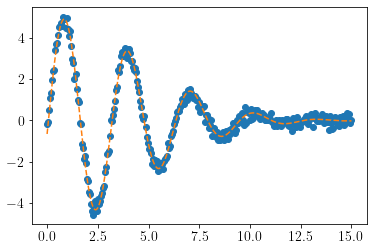

In [11]:
plt.plot(x, data, 'o')
plt.plot(x, data + fcn2min(result_brute.params, x, data), '--')
plt.show()

#### We can see that this fit is already very good, which is what we should expect since our brute force grid is sampled rather finely and encompasses the "correct" values.
#### In a more realistic, complicated example the brute method will be used to get reasonable values for the parameters and perform another minimization (e.g., using leastsq) using those as starting values. That is where the keep parameter comes into play: it determines the "number of best candidates from the brute force method that are stored in the candidates attribute". In the example above we store the best-ranking 25 solutions (the default value is 50 and storing all the grid points can be accomplished by choosing all). The candidates attribute contains the parameters and chisqr from the brute force method as a namedtuple, (‘Candidate’, [‘params’, ‘score’]), sorted on the (lowest) chisqr value. To access the values for a particular candidate one can use result.candidate[#].params or result.candidate[#].score, where a lower # represents a better candidate. The show_candidates(#) uses the pretty_print() method to show a specific candidate-# or all candidates when no number is specified.
#### The optimal fit is, as usual, stored in the MinimizerResult.params attribute and is, therefore, identical to result_brute.show_candidates(1).

In [12]:
result_brute.show_candidates(1)


Candidate #1, chisqr = 11.935
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp           5      2.5      inf     None     True     None     0.25
decay     0.025     -inf      inf     None     True     None    0.005
omega         2     -inf        5     None     True     None     0.25
shift   -0.1309   -1.571    1.571     None     True     None     None


#### In this case, the next-best scoring candidate has already a chisqr that increased quite a bit:

In [13]:
result_brute.show_candidates(2)


Candidate #2, chisqr = 13.994
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp        4.75      2.5      inf     None     True     None     0.25
decay     0.025     -inf      inf     None     True     None    0.005
omega         2     -inf        5     None     True     None     0.25
shift   -0.1309   -1.571    1.571     None     True     None     None


#### and is, therefore, probably not so likely... However, as said above, in most cases you'll want to do another minimization using the solutions from the brute method as starting values. That can be easily accomplished as shown in the code below, where we now perform a leastsq minimization starting from the top-25 solutions and accept the solution if the chisqr is lower than the previously 'optimal' solution:

In [14]:
best_result = copy.deepcopy(result_brute)

for candidate in result_brute.candidates:
    trial = fitter.minimize(method='leastsq', params=candidate.params)
    if trial.chisqr < best_result.chisqr:
        best_result = trial

#### From the leastsq minimization we obtain the following parameters for the most optimal result:

In [15]:
print(fit_report(best_result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 301
    # variables        = 4
    chi-square         = 10.8653514
    reduced chi-square = 0.03658367
    Akaike info crit   = -991.780924
    Bayesian info crit = -976.952483
[[Variables]]
    amp:    5.00323088 +/- 0.03805940 (0.76%) (init = 5.25)
    decay:  0.02563850 +/- 4.4571e-04 (1.74%) (init = 0.025)
    shift: -0.09162988 +/- 0.00978382 (10.68%) (init = 0)
    omega:  1.99611629 +/- 0.00316225 (0.16%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(shift, omega) = -0.785
    C(amp, decay)   = 0.584
    C(amp, shift)   = -0.121


#### As expected the parameters have not changed significantly as they were already very close to the "real" values, which can also be appreciated from the plots below.

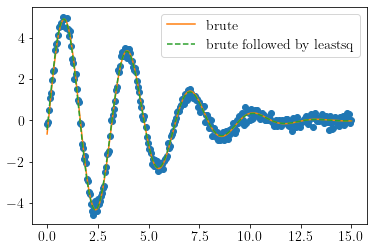

In [16]:
plt.plot(x, data, 'o')
plt.plot(x, data + fcn2min(result_brute.params, x, data), '-',
         label='brute')
plt.plot(x, data + fcn2min(best_result.params, x, data), '--',
         label='brute followed by leastsq')
plt.legend()
plt.show()

#### Finally, the results from the brute force grid-search can be visualized using the rather lengthy Python function below (which might get incorporated in lmfit at some point).

In [17]:
def plot_results_brute(result, best_vals=True, varlabels=None,
                       output=None):
    """Visualize the result of the brute force grid search.

    The output file will display the chi-square value per parameter and contour
    plots for all combination of two parameters.

    Inspired by the `corner` package (https://github.com/dfm/corner.py).

    Parameters
    ----------
    result : :class:`~lmfit.minimizer.MinimizerResult`
        Contains the results from the :meth:`brute` method.

    best_vals : bool, optional
        Whether to show the best values from the grid search (default is True).

    varlabels : list, optional
        If None (default), use `result.var_names` as axis labels, otherwise
        use the names specified in `varlabels`.

    output : str, optional
        Name of the output PDF file (default is 'None')
    """
    npars = len(result.var_names)
    _fig, axes = plt.subplots(npars, npars)

    if not varlabels:
        varlabels = result.var_names
    if best_vals and isinstance(best_vals, bool):
        best_vals = result.params

    for i, par1 in enumerate(result.var_names):
        for j, par2 in enumerate(result.var_names):

            # parameter vs chi2 in case of only one parameter
            if npars == 1:
                axes.plot(result.brute_grid, result.brute_Jout, 'o', ms=3)
                axes.set_ylabel(r'$\chi^{2}$')
                axes.set_xlabel(varlabels[i])
                if best_vals:
                    axes.axvline(best_vals[par1].value, ls='dashed', color='r')

            # parameter vs chi2 profile on top
            elif i == j and j < npars-1:
                if i == 0:
                    axes[0, 0].axis('off')
                ax = axes[i, j+1]
                red_axis = tuple(a for a in range(npars) if a != i)
                ax.plot(np.unique(result.brute_grid[i]),
                        np.minimum.reduce(result.brute_Jout, axis=red_axis),
                        'o', ms=3)
                ax.set_ylabel(r'$\chi^{2}$')
                ax.yaxis.set_label_position("right")
                ax.yaxis.set_ticks_position('right')
                ax.set_xticks([])
                if best_vals:
                    ax.axvline(best_vals[par1].value, ls='dashed', color='r')

            # parameter vs chi2 profile on the left
            elif j == 0 and i > 0:
                ax = axes[i, j]
                red_axis = tuple(a for a in range(npars) if a != i)
                ax.plot(np.minimum.reduce(result.brute_Jout, axis=red_axis),
                        np.unique(result.brute_grid[i]), 'o', ms=3)
                ax.invert_xaxis()
                ax.set_ylabel(varlabels[i])
                if i != npars-1:
                    ax.set_xticks([])
                else:
                    ax.set_xlabel(r'$\chi^{2}$')
                if best_vals:
                    ax.axhline(best_vals[par1].value, ls='dashed', color='r')

            # contour plots for all combinations of two parameters
            elif j > i:
                ax = axes[j, i+1]
                red_axis = tuple(a for a in range(npars) if a not in (i, j))
                X, Y = np.meshgrid(np.unique(result.brute_grid[i]),
                                   np.unique(result.brute_grid[j]))
                lvls1 = np.linspace(result.brute_Jout.min(),
                                    np.median(result.brute_Jout)/2.0, 7, dtype='int')
                lvls2 = np.linspace(np.median(result.brute_Jout)/2.0,
                                    np.median(result.brute_Jout), 3, dtype='int')
                lvls = np.unique(np.concatenate((lvls1, lvls2)))
                ax.contourf(X.T, Y.T, np.minimum.reduce(result.brute_Jout, axis=red_axis),
                            lvls, norm=LogNorm())
                ax.set_yticks([])
                if best_vals:
                    ax.axvline(best_vals[par1].value, ls='dashed', color='r')
                    ax.axhline(best_vals[par2].value, ls='dashed', color='r')
                    ax.plot(best_vals[par1].value, best_vals[par2].value, 'rs', ms=3)
                if j != npars-1:
                    ax.set_xticks([])
                else:
                    ax.set_xlabel(varlabels[i])
                if j - i >= 2:
                    axes[i, j].axis('off')

    if output is not None:
        plt.savefig(output)

#### and finally, to generated the figure:

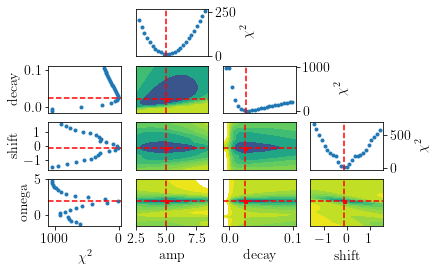

In [18]:
plot_results_brute(result_brute, best_vals=True, varlabels=None)